In [1]:
#1. a.
import numpy as np

#define constants
A = 0.3
F_s = 1370.0 #units of W/m**2
sigma = 5.67*10**(-8.0) #units of W/((m**2)*(K**4))

#calculate constants
F_e = ((1.0-A)*(F_s))/(4.0)

#calculate Temp
T_e = ((F_e)/(sigma))**(1.0/4.0) #unit of K

print '1. a. The equivalent blackbody temperature of the Earth is: ', T_e, 'K'


1. a. The equivalent blackbody temperature of the Earth is:  255.002177667 K


In [2]:
#1. b. 

#about 53% of the energy from the sun is in infrared

A = 0.3
F_s = 1370.0 #units of W/m**2
sigma = 5.67*10**(-8.0) #units of W/((m**2)*(K**4))

B = A-((0.50))

F_eir = ((1.0-B)*(F_s))/(4.0)

#calculate new temperature

T_eir = ((F_eir)/(sigma))**(1.0/4.0) #unit of K

print '1. b. The equivalent blackbody temperature of the Earth would be: ', T_eir, 'K'

1. b. The equivalent blackbody temperature of the Earth would be:  291.786161447 K


In [3]:
#1. c.

F_s = 1370.0 #units of W/m**2
sigma = 5.67*10**(-8.0) #units of W/((m**2)*(K**4))

def T(L):
    return ((((1.0-(L))*(F_s))/(4.0))/(sigma))**(1.0/4.0)

T(0.3)

255.00217766738587

In [4]:
#1. d.
print '1. d.'
print '*The Albedo (A) is what is changed by the increased concentration of greenhouse gasses.'
print '*Water is the most prominent greenhouse gas because it absorbs the most amount of energy in the spectrum radiated to Earth.'
print '*Water is the most problematic because of the reason above.'

1. d.
*The Albedo (A) is what is changed by the increased concentration of greenhouse gasses.
*Water is the most prominent greenhouse gas because it absorbs the most amount of energy in the spectrum radiated to Earth.
*Water is the most problematic because of the reason above.


In [5]:
#1. e.
print '1. e.'
print 'Yes, we are in trouble.'

1. e.
Yes, we are in trouble.


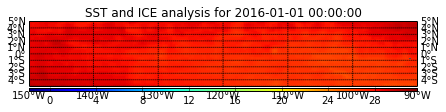

In [21]:
#2. a.

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='mill',lon_0=0,resolution=None,llcrnrlon=-150,llcrnrlat=-5,urcrnrlon=-90,urcrnrlat=5)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

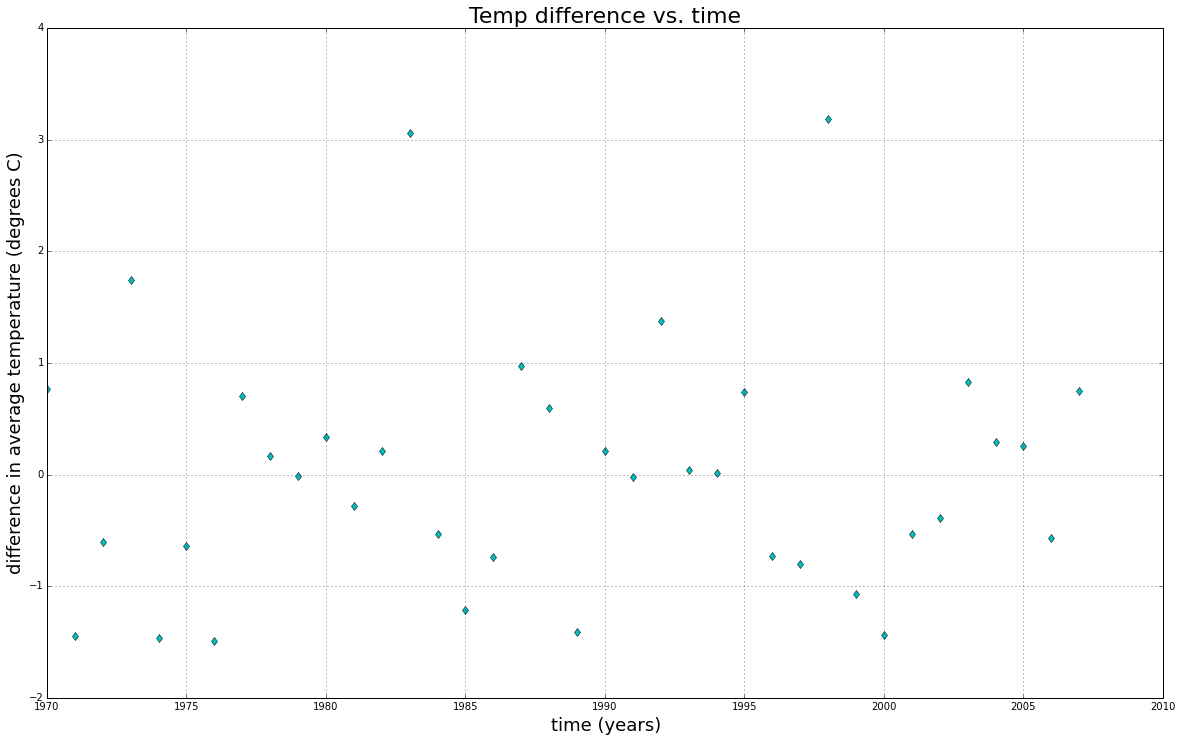

In [15]:
#2. b.

import numpy as np

NINO3_data = np.loadtxt("hw8NINO3.txt", comments="#", delimiter=",", unpack=False)
years_data = np.loadtxt("hw8years.txt", comments="#", delimiter=",", unpack=False)

plt.figure(figsize=(20,12))
plt.plot(years_data, NINO3_data,marker='d', linestyle='None', color='c', label='Data')
plt.grid(True)
plt.xlabel('time (years)',fontsize=18)
plt.ylabel('difference in average temperature (degrees C)', fontsize=18)
plt.title('Temp difference vs. time',fontsize=22)

In [16]:
#2. c.

print '2. c.'
print '*The five largest El Nino events during this time occured in 1998,1983,1973,1992, and 1987.'

2. c.
The five largest El Nino events during this time occured in 1998,1983,1973,1992, and 1987.


In [17]:
#2. d.

print '2. d.'
print '*These events sometimes seem to relate to the extreme events in precipitation/temperature, but not all of the extreme temperature differences come with extreme precipitation.'

2. d.
These events sometimes seem to relate to the extreme events in precipitation/temperature, but not all of the extreme temperature differences come with extreme precipitation.


In [28]:
#2. e.
import scipy
import scipy.stats

temp_data = np.loadtxt("hw8temp.txt", comments="#", delimiter=",", unpack=False)
precip_data = np.loadtxt("hw8precip.txt", comments="#", delimiter=",", unpack=False)
snowdepth_data = np.loadtxt("hw8snowdepth.txt", comments="#", delimiter=",", unpack=False)

temp = np.corrcoef(NINO3_data, temp_data, rowvar=False, bias=True)
precip = np.corrcoef(NINO3_data, precip_data, rowvar=False, bias=True)
snowdepth = np.corrcoef(NINO3_data, snowdepth_data, rowvar=False, bias=True)

print temp
print precip
print snowdepth

print '*This does indicate a correlation between the data sets and NINO3, with the strongest being the temperature, and the weakest being the precipitation.'
print '*The snow and precipitation correlation are not equally as strong, the snow is stronger.'
print '*These results are consistent with the maps of impacts provided.'

[[ 1.          0.00511245]
 [ 0.00511245  1.        ]]
[[ 1.         0.3771217]
 [ 0.3771217  1.       ]]
[[ 1.          0.14197231]
 [ 0.14197231  1.        ]]
*This does indicate a correlation between the data sets and NINO3, with the strongest being the temperature, and the weakest being the precipitation.
*The snow and precipitation correlation are not equally as strong, the snow is stronger.
*These results are consistent with the maps of impacts provided.


In [20]:
#2. f.

print '2. f.'
print '*The animation shows a warming trend gradually moving to the north west in a strip in the pacific ocean.'
print '*We are currently in a neutral event.'

2. f.
*The animation shows a warming trend gradually moving to the north west in a strip in the pacific ocean.
*We are currently in a neutral event.
